In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Traffic_1000_data.csv')  # Replace with your actual file path

# Inspect the first few rows of the dataset
print(data.head())

# Check the data types of the columns
print(data.dtypes)

# Check the column names
print("Column names:", data.columns.tolist())

# Convert 'Time' and 'Date' to datetime
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'], errors='coerce')

# Check for any NaT values in the 'Datetime' column
if data['Datetime'].isnull().any():
    print("There are invalid dates in the dataset:")
    print(data[data['Datetime'].isnull()])

# Drop unnecessary columns
data.drop(['Time', 'Date'], axis=1, inplace=True)

# Check the column names again after dropping
print("Column names after dropping:", data.columns.tolist())

# Encode 'Day of the week' and 'Traffic Situation'
data['Day of the week'] = data['Day of the week'].astype('category').cat.codes  # Note the exact name
data['Traffic Situation'] = data['Traffic Situation'].astype('category').cat.codes

# Check for missing values
print(data.isnull().sum())

          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        13          2         2   
1  12:15:00 AM    10         Tuesday        14          1         1   
2  12:30:00 AM    10         Tuesday        10          2         2   
3  12:45:00 AM    10         Tuesday        10          2         2   
4   1:00:00 AM    10         Tuesday        11          2         1   

   TruckCount  Total Traffic Situation  
0          24     41            normal  
1          36     52            normal  
2          32     46            normal  
3          36     50            normal  
4          34     48            normal  
Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object
Column names: ['Time', 'Date', 'Day of the week', 'CarCount',

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('TrafficTwoMonth.csv')  # Replace with your actual file path

# Convert 'Time' and 'Date' to datetime
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'], errors='coerce')

# Drop unnecessary columns
data.drop(['Time', 'Date'], axis=1, inplace=True)

# Encode 'Day of the week' and 'Traffic Situation'
data['Day of the week'] = data['Day of the week'].astype('category').cat.codes
data['Traffic Situation'] = data['Traffic Situation'].astype('category').cat.codes

# Define features (X) and target (y)
X = data.drop(['Traffic Situation', 'Datetime'], axis=1)  # Features
y = data['Traffic Situation']  # Target variable

# Normalize/Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

C:\Users\abhir\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


X_train shape: (4761, 6)
X_test shape: (1191, 6)
y_train shape: (4761,)
y_test shape: (1191,)


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the dataset
data = pd.read_csv('TrafficTwoMonth.csv')  # Replace with your actual file path

# Convert 'Time' and 'Date' to datetime
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'], errors='coerce')

# Drop unnecessary columns
data.drop(['Time', 'Date'], axis=1, inplace=True)

# Encode 'Day of the week' and 'Traffic Situation'
data['Day of the week'] = data['Day of the week'].astype('category').cat.codes
data['Traffic Situation'] = data['Traffic Situation'].astype('category').cat.codes

# Define features (X) and target (y)
X = data.drop(['Traffic Situation', 'Datetime'], axis=1)  # Features
y = data['Traffic Situation']  # Target variable

# Normalize/Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create sequences of time steps
time_steps = 5
X_sequences = []
y_sequences = []

for i in range(len(X_scaled) - time_steps):
    X_sequences.append(X_scaled[i:i + time_steps])
    y_sequences.append(y[i + time_steps])  # Target is the label after the sequence

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Convert target variable to categorical
y_sequences_categorical = to_categorical(y_sequences)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences_categorical, test_size=0.2, random_state=42)

# Build the CNN-LSTM model
model = Sequential()

# Add a 1D Convolutional layer
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Add LSTM layer
model.add(LSTM(50, return_sequences=False))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add a Dense layer for output
model.add(Dense(y_train.shape[1], activation='softmax'))  # Use 'sigmoid' for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/50
149/149 [==============================] - 7s 16ms/step - loss: 0.9148 - accuracy: 0.6597 - val_loss: 0.8213 - val_accuracy: 0.6983
Epoch 2/50
149/149 [==============================] - 1s 8ms/step - loss: 0.8118 - accuracy: 0.7019 - val_loss: 0.7885 - val_accuracy: 0.7160
Epoch 3/50
149/149 [==============================] - 1s 9ms/step - loss: 0.7847 - accuracy: 0.7141 - val_loss: 0.7747 - val_accuracy: 0.7193
Epoch 4/50
149/149 [==============================] - 1s 9ms/step - loss: 0.7700 - accuracy: 0.7164 - val_loss: 0.7642 - val_accuracy: 0.7202
Epoch 5/50
149/149 [==============================] - 1s 9ms/step - loss: 0.7583 - accuracy: 0.7177 - val_loss: 0.7650 - val_accuracy: 0.7244
Epoch 6/50
149/149 [==============================] - 1s 8ms/step - loss: 0.7518 - accuracy: 0.7160 - val_loss: 0.7629 - val_accuracy: 0.7244
Epoch 7/50
149/149 [==============================] - 1s 8ms/step - loss: 0.7492 - accuracy: 0.7185 - val_loss: 0.7598 - val_accuracy: 0.7193
Epoch

38/38 [==============================] - 0s 3ms/step


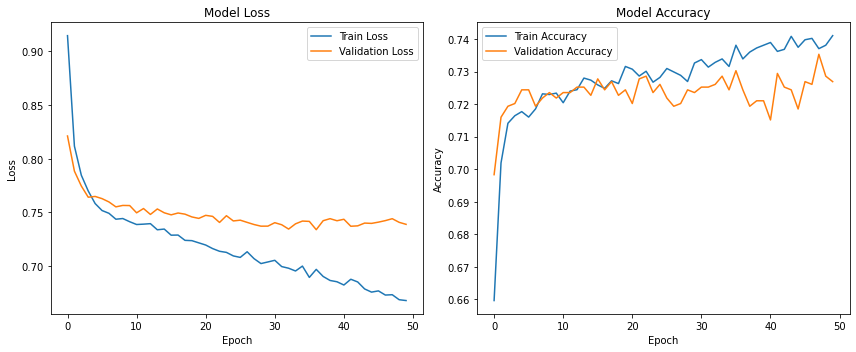

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


# Optionally, plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [6]:
# Save the model
model.save('cnn_lstm_traffic_model.h5')
print("Model saved as cnn_lstm_traffic_model.h5")

Model saved as cnn_lstm_traffic_model.h5


C:\Users\abhir\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
